<a href="https://colab.research.google.com/github/PriyanshuRao-code/AI-Lab-Project/blob/Priyanshu-Rao/team_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Don't do anything here. It's just a setup.
import os
import sys

repo_name = "AI-Lab-Project"
repo_url = "https://github.com/PriyanshuRao-code/AI-Lab-Project.git"
repo_path = f"/content/{repo_name}"

if os.path.exists(repo_path):
    print("Repository already exists at:", repo_path)
else:
    print("🚀 Cloning the repository...")
    os.system(f"git clone {repo_url}")

os.chdir(repo_path)
sys.path.append(repo_path)

print("Repository is ready to use at:", repo_path)

Repository already exists at: /content/AI-Lab-Project
Repository is ready to use at: /content/AI-Lab-Project


In [2]:
# Using supporting files (now as .ipynb and later .py)

# %run team_24_data_preprocessing.ipynb
# %run team_24_supervised_learning.ipynb

# from team_24_data_preprocessing import *
# from team_24_supervised_learning import *

In [3]:
# Start coding from here

Repository already exists at: /content/AI-Lab-Project
Repository is ready to use at: /content/AI-Lab-Project
Repository already exists at: /content/AI-Lab-Project
Repository is ready to use at: /content/AI-Lab-Project

Evaluation Metrics for Perceptron (Validation):


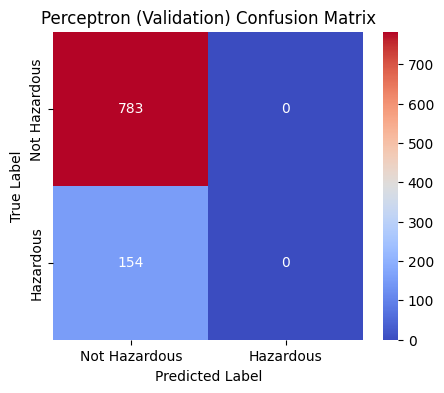


  Accuracy:  0.8356
  Precision: 0.0000
  Recall:    0.0000
  F1-score:  0.0000

Evaluation Metrics for Perceptron (Test):


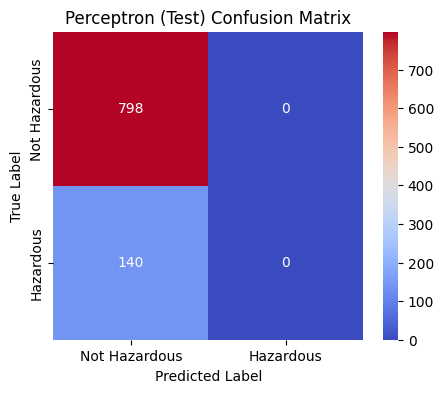


  Accuracy:  0.8507
  Precision: 0.0000
  Recall:    0.0000
  F1-score:  0.0000

Evaluation Metrics for Naïve Bayes (Validation):


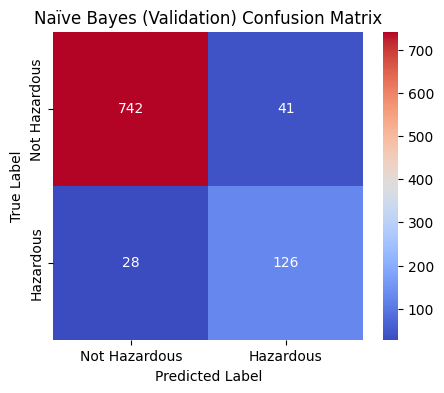


  Accuracy:  0.9264
  Precision: 0.7545
  Recall:    0.8182
  F1-score:  0.7850

Evaluation Metrics for Naïve Bayes (Test):


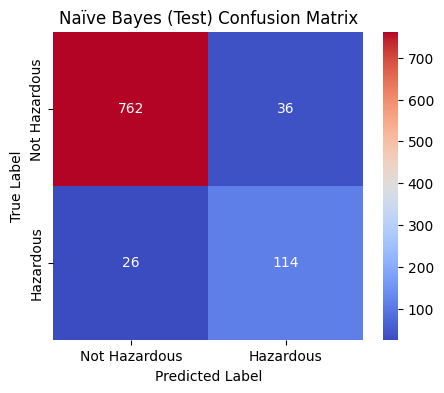


  Accuracy:  0.9339
  Precision: 0.7600
  Recall:    0.8143
  F1-score:  0.7862

Evaluation Metrics for KNN with Mahalanobis (Validation):


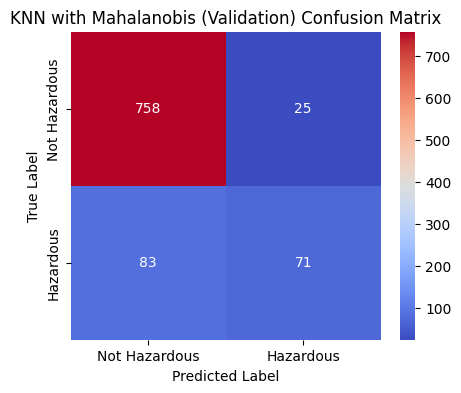


  Accuracy:  0.8847
  Precision: 0.7396
  Recall:    0.4610
  F1-score:  0.5680

Evaluation Metrics for KNN with Mahalanobis (Test):


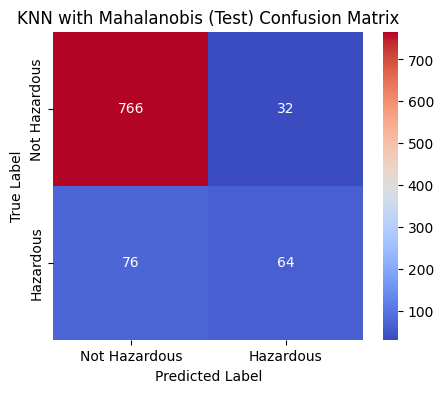


  Accuracy:  0.8849
  Precision: 0.6667
  Recall:    0.4571
  F1-score:  0.5424

Evaluation Metrics for Logistic Regression (Validation):


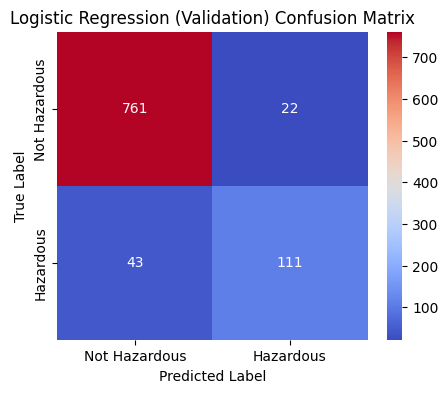


  Accuracy:  0.9306
  Precision: 0.8346
  Recall:    0.7208
  F1-score:  0.7735

Evaluation Metrics for Logistic Regression (Test):


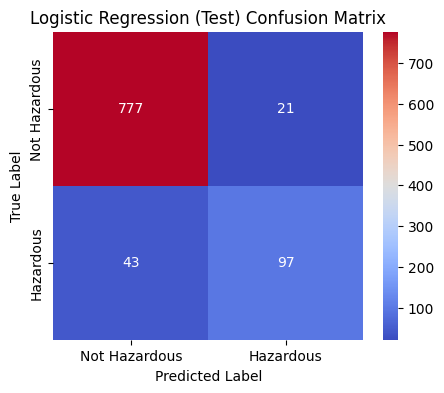


  Accuracy:  0.9318
  Precision: 0.8220
  Recall:    0.6929
  F1-score:  0.7519

Evaluation Metrics for Support Vector Machine (Validation):


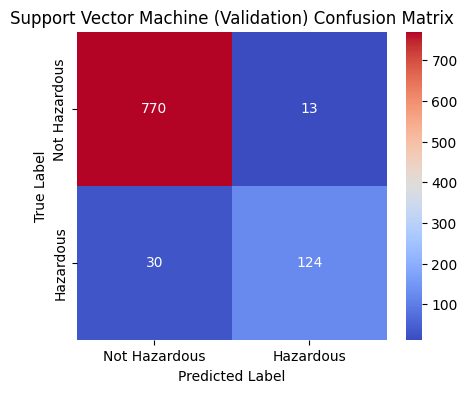


  Accuracy:  0.9541
  Precision: 0.9051
  Recall:    0.8052
  F1-score:  0.8522

Evaluation Metrics for Support Vector Machine (Test):


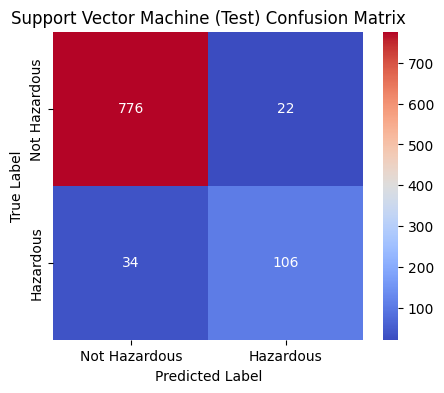


  Accuracy:  0.9403
  Precision: 0.8281
  Recall:    0.7571
  F1-score:  0.7910


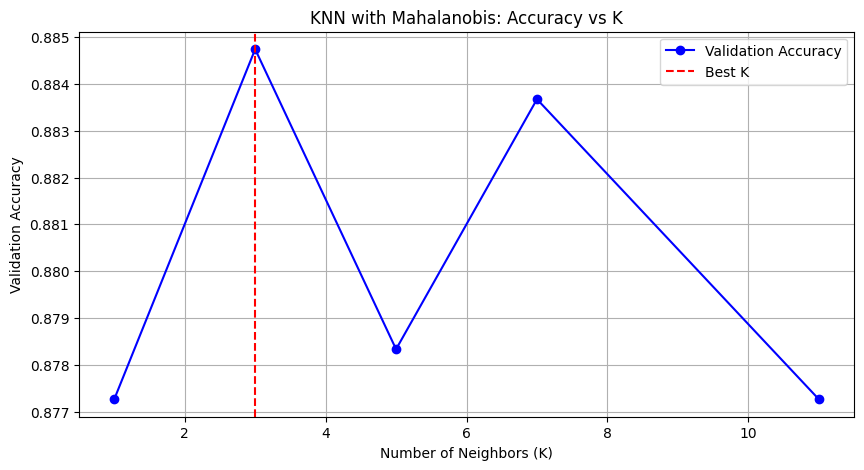

In [4]:
!pip install import-ipynb
import import_ipynb
from team_24_data_preprocessing import *
from team_24_supervised_learning import *

In [5]:
df = pd.read_csv('24.csv')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df_train_orig, df_temp = train_test_split(df, test_size=0.4, random_state=42)
df_valid_orig, df_test_orig = train_test_split(df_temp, test_size=0.5, random_state=42)
df_train_orig.reset_index(drop=True, inplace=True)
df_valid_orig.reset_index(drop=True, inplace=True)
df_test_orig.reset_index(drop=True, inplace=True)

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Step 1: All Preprocessing Pipelines Combination Setup
pipelines = [
    {"outlier": None, "encode": "label", "scale": "minmax", "correlation": False, "pca": False},
    {"outlier": "iqr", "encode": "not-onehot", "scale": "standard", "correlation": True, "pca": False},
    {"outlier": "iqr", "encode": "label", "scale": "standard", "correlation": True, "pca": False},
    {"outlier": "zscore", "encode": "label", "scale": "minmax", "correlation": False, "pca": False},
    # Add more smart combinations as needed
]

# Step 2: Models to Compare
models = {
    "Perceptron": train_model_perceptron,
    "Logistic Regression": train_model_logistic,
    # "Random Forest": train_model_rf,
    # "KNN": train_model_knn,
    # Add More Models
}


# Step 3: Preprocessing Function
def process_pipeline(df_train, df_valid, df_test, config):
    # Outlier Removal
    if config['outlier'] == "iqr":
        df_train, df_valid, df_test = remove_outliers_iqr(df_train, df_valid, df_test)
    elif config['outlier'] == "zscore":
        df_train, df_valid, df_test = remove_outliers_zscore(df_train, df_valid, df_test)

    # Feature Scaling
    if config['scale'] == "minmax":
        df_train, df_valid, df_test = normalize_minmax(df_train, df_valid, df_test)
    elif config['scale'] == "standard":
        df_train, df_valid, df_test = standardize_data(df_train, df_valid, df_test)

    # Feature Selection
    if config['correlation']:
        df_train, df_valid, df_test = remove_highly_correlated(df_train, df_valid, df_test)

    # Dimensionality Reduction
    if config['pca']:
        df_train, df_valid, df_test = perform_pca(df_train, df_valid, df_test)

    # Encoding
    if config['encode'] == "label":
        df_train, df_valid, df_test = label_encode_categorical(df_train, df_valid, df_test)
    elif config['encode'] == "not-onehot":
        df_train, df_valid, df_test = process_splits(df_train, df_valid, df_test, one_hot_encode_month=False)

    return df_train, df_valid, df_test


# Step 4: Evaluation Function Example
def evaluate_model(y_true, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall": recall_score(y_true, y_pred, zero_division=0),
        "f1_score": f1_score(y_true, y_pred, zero_division=0)
    }


# Step 5: Final Loop
results = []

for config in pipelines:
    df_train, df_valid, df_test = process_pipeline(df_train_orig.copy(), df_valid_orig.copy(), df_test_orig.copy(), config)

    for model_name, model_func in models.items():
        model, y_valid, y_test, y_valid_pred, y_test_pred = model_func(df_train, df_valid, df_test)

        metrics_valid = evaluate_model(y_valid, y_valid_pred)
        metrics_test = evaluate_model(y_test, y_test_pred)

        results.append({
            "pipeline": config,
            "model": model_name,
            "valid": metrics_valid,
            "test": metrics_test
        })


# Step 6: Convert Results into DataFrame
df_results = pd.json_normalize(results, sep='_')

In [19]:
df_results

,model,pipeline_outlier,pipeline_encode,pipeline_scale,pipeline_correlation,pipeline_pca,valid_accuracy,valid_precision,valid_recall,valid_f1_score,test_accuracy,test_precision,test_recall,test_f1_score
0,Perceptron,None,label,minmax,False,False,0.821772,0.217391,0.032468,0.056497,0.831557,0.178571,0.035714,0.059524
1,Logistic Regression,None,label,minmax,False,False,0.835646,0.000000,0.000000,0.000000,0.850746,0.000000,0.000000,0.000000
2,Perceptron,iqr,not-onehot,standard,True,False,0.398079,0.196746,0.863636,0.320482,0.392324,0.175227,0.828571,0.289277
3,Logistic Regression,iqr,not-onehot,standard,True,False,0.955176,0.917910,0.798701,0.854167,0.954158,0.907563,0.771429,0.833977
4,Perceptron,iqr,label,standard,True,False,0.768410,0.270073,0.240260,0.254296,0.767591,0.221429,0.221429,0.221429
5,Logistic Regression,iqr,label,standard,True,False,0.842049,0.513636,0.733766,0.604278,0.842217,0.481308,0.735714,0.581921
6,Perceptron,zscore,label,minmax,False,False,0.736393,0.170213,0.155844,0.162712,0.743070,0.165563,0.178571,0.171821
7,Logistic Regression,zscore,label,minmax,False,False,0.830309,0.333333,0.032468,0.059172,0.846482,0.300000,0.021429,0.040000


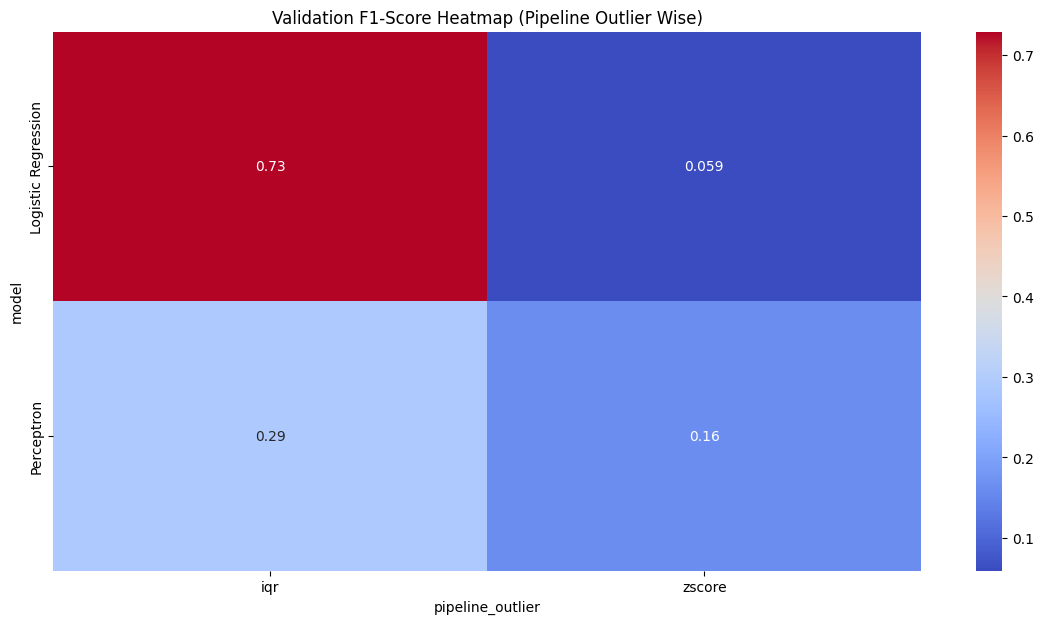

In [20]:
pivot = df_results.pivot_table(index='model', columns='pipeline_outlier', values='valid_f1_score', aggfunc='mean')
plt.figure(figsize=(14,7))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Validation F1-Score Heatmap (Pipeline Outlier Wise)")
plt.show()


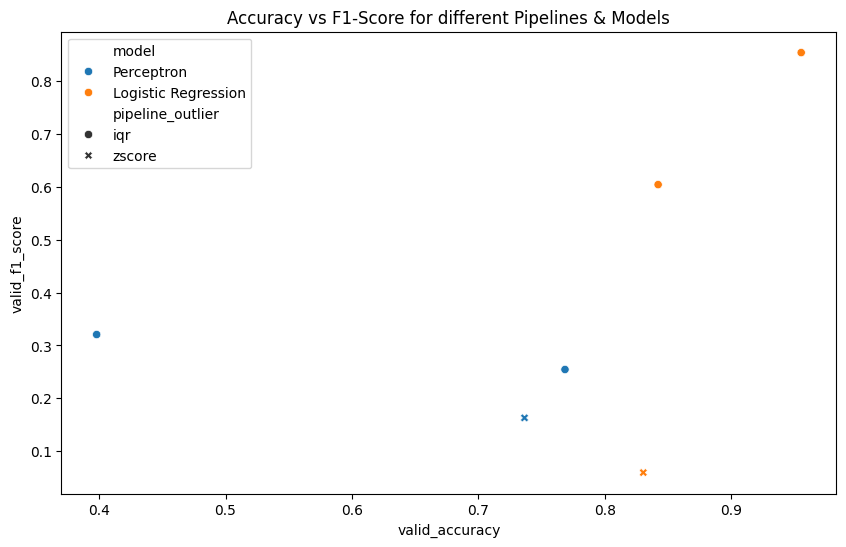

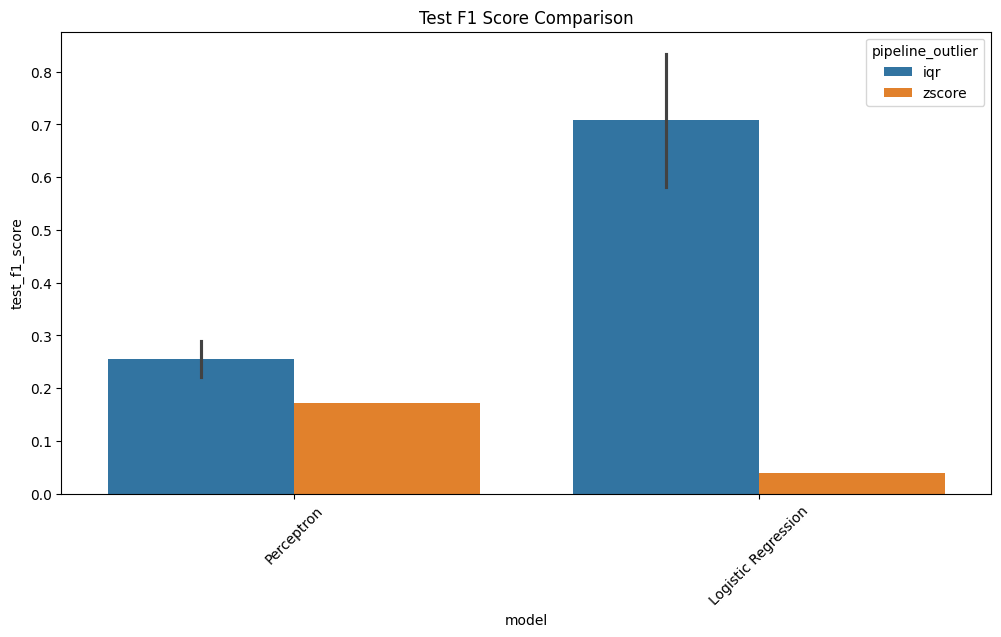

In [21]:
# Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_results, x='valid_accuracy', y='valid_f1_score', hue='model', style='pipeline_outlier')
plt.title("Accuracy vs F1-Score for different Pipelines & Models")
plt.show()

# Bar Plot
plt.figure(figsize=(12,6))
sns.barplot(data=df_results, x='model', y='test_f1_score', hue='pipeline_outlier')
plt.xticks(rotation=45)
plt.title("Test F1 Score Comparison")
plt.show()
